### MACHINE LEARNING WITH IOT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-4/mobile_data.csv")
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [5]:
df.isnull().sum()

X    0
Y    0
Z    0
dtype: int64

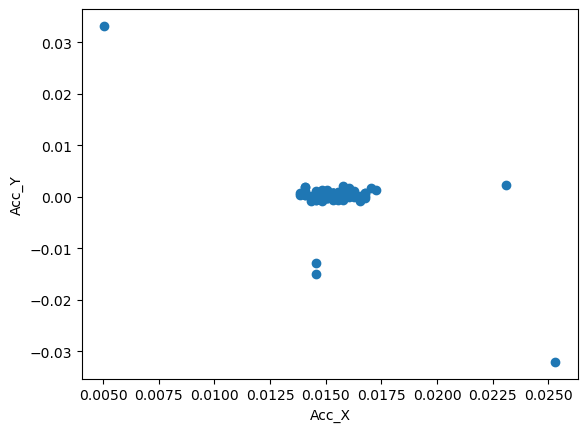

In [6]:
plt.scatter(df['X'],df['Y'])
plt.xlabel("Acc_X")
plt.ylabel("Acc_Y")
plt.show()

Text(0, 0.5, 'Acc_Z')

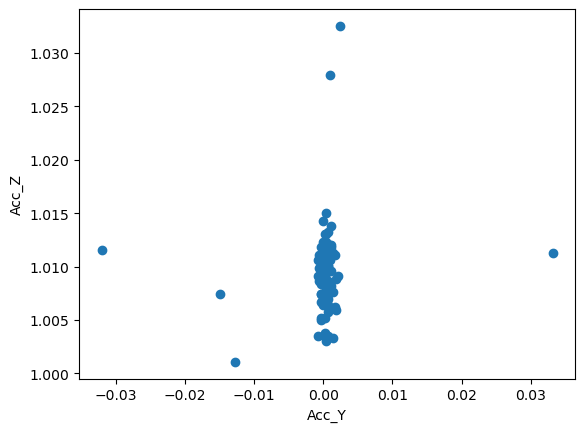

In [7]:
plt.scatter(df["Y"],df["Z"])
plt.xlabel("Acc_Y")
plt.ylabel("Acc_Z")

In [8]:
relevant_cols = ["X","Y","Z"]

final_df = df[relevant_cols]
final_df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(final_df)

StandardScaler()

In [10]:
scaled_data = scaler.transform(final_df)
scaled_data

array([[-0.46128391, -2.9749853 , -0.53177541],
       [-0.73504371,  0.34922248, -0.16545644],
       [-0.32440485,  0.01198401,  0.56720576],
       [-0.73504371,  0.20469171,  0.56720576],
       [-0.46128391, -2.54139317, -2.1192064 ],
       [ 4.3295022 ,  0.44557633,  5.75682218],
       [-0.18752524,  0.20469171,  0.62825905],
       [-0.46128391, -0.03619291, -0.16545644],
       [ 0.22311418, -0.03619291,  0.0787562 ],
       [-0.32440485, -0.08436983, -0.04335012],
       [-0.46128391,  0.06016094, -0.28756277],
       [-0.18752524,  0.10833786,  0.26191556],
       [-0.32440485,  0.15651479,  0.38402188],
       [ 0.49687286, -0.03619291, -0.5928287 ],
       [ 0.22311418, -0.03619291,  0.26191556],
       [-0.18752524, -0.08436983, -0.10440341],
       [-0.18752524,  0.15651479,  0.26191556],
       [ 0.35999324,  0.10833786, -0.65390625],
       [ 1.04439134,  0.25286864, -1.56970355],
       [ 0.35999324,  0.06016094, -1.56970355],
       [ 0.63375304, -0.18072368, -1.508

In [11]:
def find_best_clusters(df, maximum_K):
  clusters_centers = []
  k_values = []
  for k in range(1, maximum_K):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)
  return clusters_centers, k_values

In [12]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

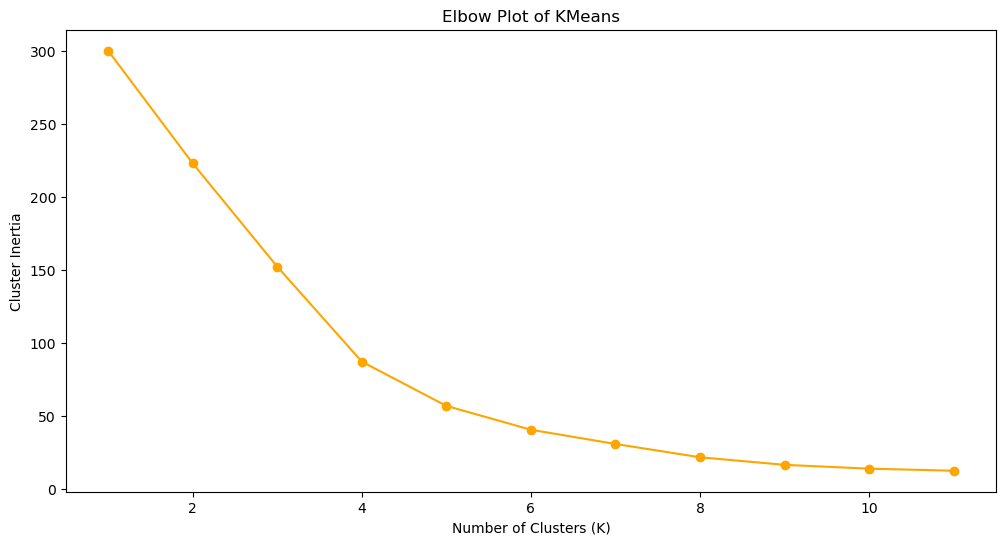

In [13]:
def generate_elbow_plot(clusters_centers, k_values):

  figure = plt.subplots(figsize = (12, 6))
  plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
  plt.xlabel("Number of Clusters (K)")
  plt.ylabel("Cluster Inertia")
  plt.title("Elbow Plot of KMeans")
  plt.show()
    
generate_elbow_plot(clusters_centers, k_values)

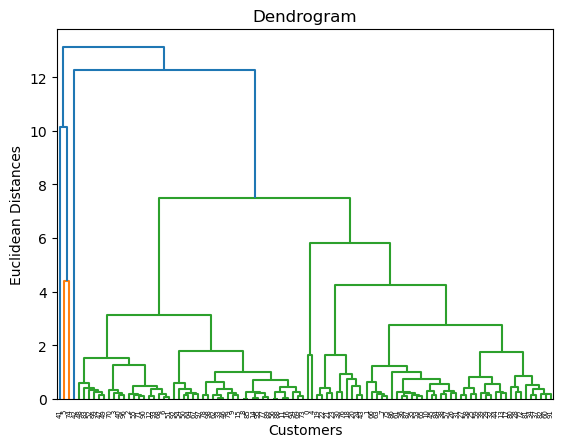

In [14]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show()